导入实验所需要的包

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

在第一次实验我们验证两张相似图像进行幅频相频的交换实验  
这里选取的是新海诚导演动画电影中的一个场景  
分别对动漫场景图和实地拍摄图进行傅里叶变换

先导入ani图像，查看大小

In [28]:
img1 = cv2.imread('ani.png',0)
rows, cols = img1.shape
print(rows, cols)

445 670


计算DFT效率最佳的尺寸并修改

In [29]:
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(nrows, ncols)
nimg = np.zeros((nrows, ncols))
nimg[:rows, :cols] = img1
img1 = nimg

450 675


OpenCV计算快速傅里叶变换，输入图像应首先转换为np.float32，然后使用函数cv2.dft()和cv2.idft()。  
返回结果与Numpy相同，但有两个通道。第一个通道为有结果的实部，第二个通道为有结果的虚部。

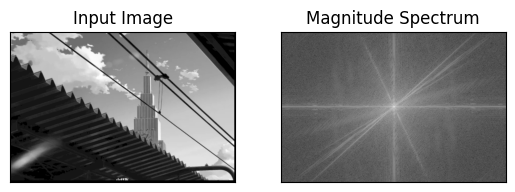

In [30]:
dft1 = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft1)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img1, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

显示第一张图的幅频与相频

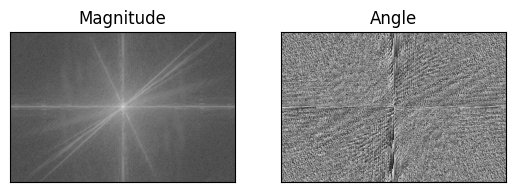

In [31]:
mag1, ang1 = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1], angleInDegrees=True)
mag=20*np.log(mag1)
plt.subplot(121), plt.imshow(mag, cmap='gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(ang1, cmap='gray')
plt.title('Angle'), plt.xticks([]), plt.yticks([])
plt.show()

以同样的方式对第二张图象进行变换

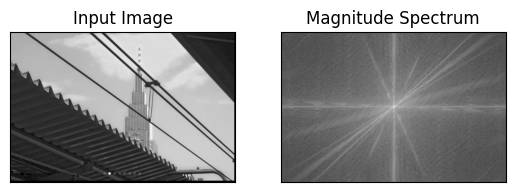

In [32]:
img2 = cv2.imread('rel.png',0)
rows, cols = img2.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
nimg = np.zeros((nrows, ncols))
nimg[:rows, :cols] = img2
img2 = nimg

dft2 = cv2.dft(np.float32(img2), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft2)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

显示幅频与相频

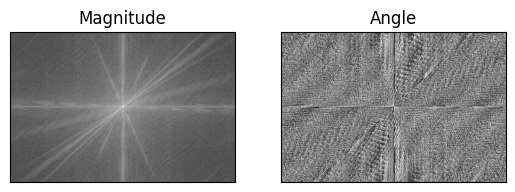

In [33]:
mag2, ang2 = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1], angleInDegrees=True)
mag=20*np.log(mag2)
plt.subplot(121), plt.imshow(mag, cmap='gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(ang2, cmap='gray')
plt.title('Angle'), plt.xticks([]), plt.yticks([])
plt.show()

可以发现，由于图像风格相似，故图像差异并不大。  
接下来进行幅频与相频的交换

(450, 675, 2)


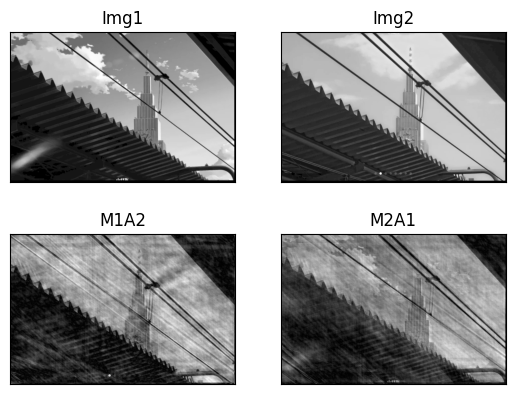

In [34]:
x,y = cv2.polarToCart(mag1,ang2,angleInDegrees=True)
dft3 = np.fft.ifftshift(np.concatenate((x[:,:,np.newaxis],y[:,:,np.newaxis]), axis=2))
print(dft3.shape)
x,y = cv2.polarToCart(mag2,ang1,angleInDegrees=True)
dft4 = np.fft.ifftshift(np.concatenate((x[:,:,np.newaxis],y[:,:,np.newaxis]), axis=2))


img3 = cv2.idft(dft3)
img3 = cv2.magnitude(img3[:,:,0],img3[:,:,1])
img4 = cv2.idft(dft4)
img4 = cv2.magnitude(img4[:,:,0],img4[:,:,1])

plt.subplot(221), plt.imshow(img1, cmap='gray')
plt.title('Img1'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img2, cmap='gray')
plt.title('Img2'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img3, cmap='gray')
plt.title('M1A2'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img4, cmap='gray')
plt.title('M2A1'), plt.xticks([]), plt.yticks([])
plt.show()

细节显示交换后的图像

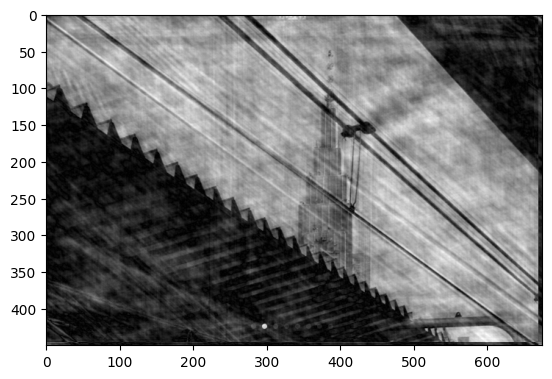

In [35]:
plt.imshow(img3,cmap='gray')

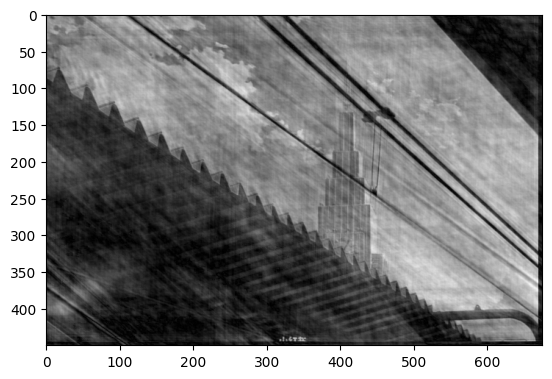

In [36]:
plt.imshow(img4,cmap='gray')

考虑到实验目的，我们更换两张差异性更大的图像  
以同样的步骤重复以上实验

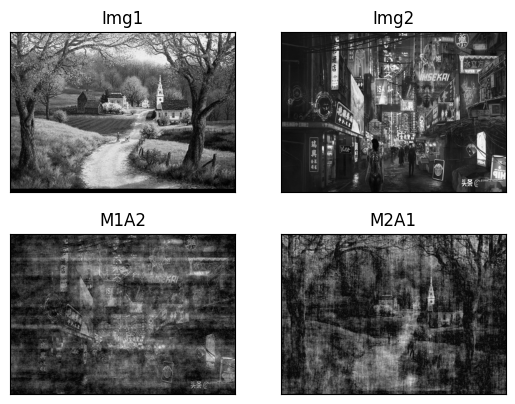

In [37]:
img1 = cv2.imread('img0.jpeg',0)
rows, cols = img1.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
nimg = np.zeros((nrows, ncols))
nimg[:rows, :cols] = img1
img1 = nimg
img2 = cv2.imread('img1.jpeg',0)
img2 = cv2.resize(img2,(ncols,nrows))
dft1 = cv2.dft(np.float32(img1), flags=cv2.DFT_COMPLEX_OUTPUT)
mag1, ang1 = cv2.cartToPolar(dft1[:,:,0], dft1[:,:,1], angleInDegrees=True)
dft2 = cv2.dft(np.float32(img2), flags=cv2.DFT_COMPLEX_OUTPUT)
mag2, ang2 = cv2.cartToPolar(dft2[:,:,0], dft2[:,:,1], angleInDegrees=True)

x,y = cv2.polarToCart(mag1,ang2,angleInDegrees=True)
dft3 = np.concatenate((x[:,:,np.newaxis],y[:,:,np.newaxis]), axis=2)
x,y = cv2.polarToCart(mag2,ang1,angleInDegrees=True)
dft4 = np.concatenate((x[:,:,np.newaxis],y[:,:,np.newaxis]), axis=2)

img3 = cv2.idft(dft3)
img3 = cv2.magnitude(img3[:,:,0],img3[:,:,1])
img4 = cv2.idft(dft4)
img4 = cv2.magnitude(img4[:,:,0],img4[:,:,1])

plt.subplot(221), plt.imshow(img1, cmap='gray')
plt.title('Img1'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img2, cmap='gray')
plt.title('Img2'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img3, cmap='gray')
plt.title('M1A2'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img4, cmap='gray')
plt.title('M2A1'), plt.xticks([]), plt.yticks([])
plt.show()

放大显示交换后的图片

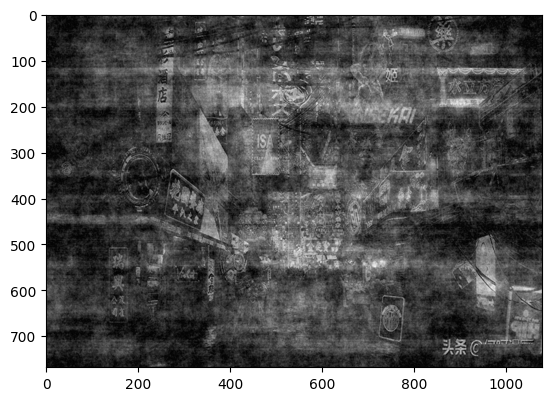

In [38]:
plt.imshow(img3,cmap='gray')

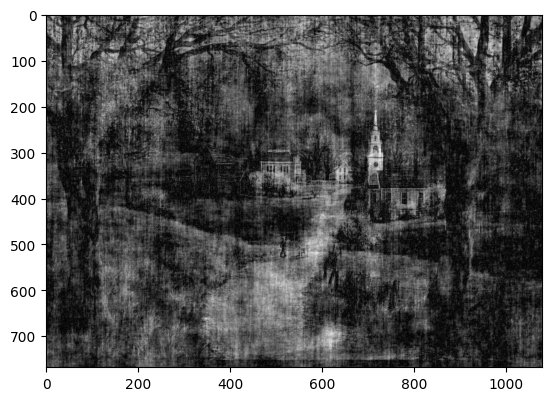

In [39]:
plt.imshow(img4,cmap='gray')

经过与原图对比，我们发现：
相频主要决定了图像的细节与纹理信息，比如更换后的图像分别沿用了原图相频中的具体景物，以及出现的细节特征（人、建筑）。  
而幅频主要决定了图像的强度特征，比如明暗区域在对应图像中是近似的，整体图案的明暗分布的横向/纵向与原来对应。

经过资料查找，我们得到以下结论：  
幅频表示图像各个频率分量的强度大小，即它们对原始图像的贡献程度。 
在幅频图像中，每个像素的值表示对应频率分量的强度大小，通常使用灰度图像表示，值越大表示该频率分量对原始图像的贡献越大。
相频表示图像各个频率分量的相位信息，即它们的位置和方向。  
在相频图像中，每个像素的值表示对应频率分量的相位角度，通常使用彩色图像表示，用不同的颜色表示不同的相位角度。
因此，在图像傅里叶变换后，幅频和相频都包含了原始图像在频域中的信息，这些信息可以被用于图像处理和分析。  
例如，在频域中，高频分量对应图像的细节信息，低频分量对应图像的整体特征；相位信息则对应图像的纹理信息。  
因此，分析和处理幅频和相频可以帮助我们更好地理解和处理图像。